# Data Wrangling

In [1]:
import matplotlib.pyplot as plt
import nltk
import pymongo
import pandas as pd
import re

from pymongo import MongoClient
from nltk.corpus import stopwords
from wordcloud import WordCloud

### Processo ETL
O processo de extrçao dos Tweets foi feito pelo script `tweets_extracts.py` que pode ser encontrado no mesmo repo deste notebook, o processo de Data Wragling agora é simplesmente uma busca pelo Tweets do idioma pt

In [51]:
client = pymongo.MongoClient("mongodb+srv://dbUser:<PWD>@cluster0.vbnow.mongodb.net/hackathon_santander?retryWrites=true&w=majority")
db = client.hackathon_santander

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/whrocha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

###  Filtros
- Somente tweets marcados como pt pelo Twitter.
- Retirado do texto a palavra RT para nao atrapalhar na visualizaçao do word cloud

In [4]:
def filter_entries(entries, stopwords):

    text_entries = entries
    regex_str = '[^a-zA-Z\u00C0-\u00FF 0-9]+'
    subbed_entries = re.sub(regex_str, ' ', text_entries)
    split_entries = subbed_entries.split()

    stop_words = stopwords

    entries_words = []

    for word in split_entries:
        if word not in stop_words:
            entries_words.append(word)

    return entries_words

In [5]:
words = []

stop_words = set(stopwords.words('portuguese'))

myquery = { 
    "lang": "pt",
}

for tweet in db.tweet_stream_db.find(myquery):
    
    try:
        text_tweet = tweet['extended_tweet']['full_text']
    except:
        text_tweet = tweet['text']
    
    entries = filter_entries(text_tweet.replace('RT', ''), stop_words)
    
    words.append(entries)
    
string_words = ' '.join([str(w1) for w in words for w1 in w])

# Modelagem / Estudos

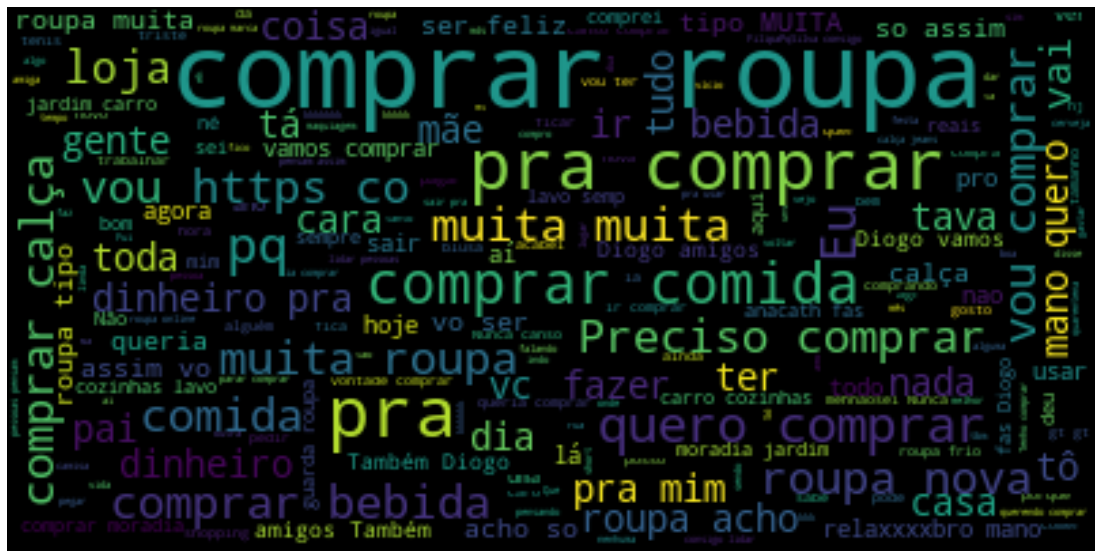

In [6]:
# Generate a word cloud image
wordcloud = WordCloud().generate(string_words)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")

# lower max_font_size
# wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Validação dos resultados

In [8]:
api_key_ibm = {
  "apikey": "",
  "iam_apikey_description": "",
  "iam_apikey_name": "",
  "iam_role_crn": "",
  "iam_serviceid_crn": "",
  "url": ""
}

In [9]:
import json

from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, SentimentOptions


### Análise de sentimento
Analise de sentimento para direcionar os lead dos tweets feitos que contém os termos `COMPRAR` `ROUPA`

In [10]:
def return_tweet_sentiment(tweet_text):
    
    authenticator = IAMAuthenticator(api_key_ibm['apikey'])

    natural_language_understanding = NaturalLanguageUnderstandingV1(
        version='2019-07-12',
        authenticator=authenticator
    )

    natural_language_understanding.set_service_url(api_key_ibm['url'])

    response = natural_language_understanding.analyze(
        text=tweet_text,
        features=Features(
            sentiment=SentimentOptions()
        )
    ).get_result()

    return response
    

In [11]:
# pesquisar somente os tweets que possuem COMPRAR ROUPA
myquery = { 
    "lang": "pt"
}

substring1 = "comprar" 
substring2 = "roupa"

tweets_sentimental_analysis = []

i = 0

for tweet in db.tweet_stream_db.find(myquery):
    
    print(f'processing tweet {i}')
    
    try:
        text_tweet = tweet['extended_tweet']['full_text']
    except:
        text_tweet = tweet['text']
        
    # pesquisar se a tweet contem as palavras comprar e roupas
    if substring1 in text_tweet.lower() and substring2 in text_tweet.lower():
        
        print(f'-- Start sentimental analysis')
        
        sentiment = return_tweet_sentiment(text_tweet)
        
        item = {
            'id': tweet['id'],
            'text_tweet': text_tweet,
            'sentiment_score': sentiment['sentiment']['document']['score'],
            'sentiment_label': sentiment['sentiment']['document']['label'],
            'sentiment_language': sentiment['language']
        }
        
        tweets_sentimental_analysis.append(item)
        
        print(f'-- Start sentimental analysis: DONE!')
        
    i += 1
        
        

processing tweet 0
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1
processing tweet 2
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 3
processing tweet 4
processing tweet 5
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 6
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 7
processing tweet 8
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 9
processing tweet 10
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 11
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 12
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 13
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 14
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 15
processing tweet 16


-- Start sentimental analysis: DONE!
processing tweet 144
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 145
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 146
processing tweet 147
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 148
processing tweet 149
processing tweet 150
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 151
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 152
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 153
processing tweet 154
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 155
processing tweet 156
processing tweet 157
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 158
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 159
-- Start sentimental ana

-- Start sentimental analysis: DONE!
processing tweet 279
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 280
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 281
processing tweet 282
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 283
processing tweet 284
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 285
processing tweet 286
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 287
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 288
processing tweet 289
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 290
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 291
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 292
-- Start sentimental analysis
-- Start sentimental analysis: DONE!

-- Start sentimental analysis: DONE!
processing tweet 403
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 404
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 405
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 406
processing tweet 407
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 408
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 409
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 410
processing tweet 411
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 412
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 413
processing tweet 414
processing tweet 415
processing tweet 416
processing tweet 417
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 418
-- Start sentimental ana

-- Start sentimental analysis: DONE!
processing tweet 546
processing tweet 547
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 548
processing tweet 549
processing tweet 550
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 551
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 552
processing tweet 553
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 554
processing tweet 555
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 556
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 557
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 558
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 559
processing tweet 560
processing tweet 561
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 562
pro

-- Start sentimental analysis: DONE!
processing tweet 673
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 674
processing tweet 675
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 676
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 677
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 678
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 679
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 680
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 681
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 682
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 683
processing tweet 684
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 685
-- Start sentimental

-- Start sentimental analysis: DONE!
processing tweet 820
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 821
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 822
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 823
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 824
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 825
processing tweet 826
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 827
processing tweet 828
processing tweet 829
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 830
processing tweet 831
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 832
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 833
processing tweet 834
-- Start sentimental analysis
-- Start sentim

-- Start sentimental analysis: DONE!
processing tweet 959
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 960
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 961
processing tweet 962
processing tweet 963
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 964
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 965
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 966
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 967
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 968
processing tweet 969
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 970
processing tweet 971
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 972
processing tweet 973
processing tweet 974
processing tweet 975
-- 

-- Start sentimental analysis: DONE!
processing tweet 1093
processing tweet 1094
processing tweet 1095
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1096
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1097
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1098
processing tweet 1099
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1100
processing tweet 1101
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1102
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1103
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1104
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1105
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1106
-- Start sentimental analysis
-- Start sentimental a

-- Start sentimental analysis: DONE!
processing tweet 1219
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1220
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1221
processing tweet 1222
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1223
processing tweet 1224
processing tweet 1225
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1226
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1227
processing tweet 1228
processing tweet 1229
processing tweet 1230
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1231
processing tweet 1232
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1233
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1234
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processi

-- Start sentimental analysis: DONE!
processing tweet 1352
processing tweet 1353
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1354
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1355
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1356
processing tweet 1357
processing tweet 1358
processing tweet 1359
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1360
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1361
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1362
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1363
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1364
processing tweet 1365
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1366
-- Start sentimental analysis


-- Start sentimental analysis: DONE!
processing tweet 1474
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1475
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1476
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1477
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1478
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1479
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1480
processing tweet 1481
processing tweet 1482
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1483
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1484
processing tweet 1485
processing tweet 1486
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1487
-- Start sentimental analysis
-- Start sentimental a

-- Start sentimental analysis: DONE!
processing tweet 1605
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1606
processing tweet 1607
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1608
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1609
processing tweet 1610
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1611
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1612
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1613
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1614
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1615
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1616
processing tweet 1617
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
process

-- Start sentimental analysis: DONE!
processing tweet 1736
processing tweet 1737
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1738
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1739
processing tweet 1740
processing tweet 1741
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1742
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1743
processing tweet 1744
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1745
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1746
processing tweet 1747
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1748
processing tweet 1749
processing tweet 1750
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1751
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processi

-- Start sentimental analysis: DONE!
processing tweet 1867
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1868
processing tweet 1869
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1870
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1871
processing tweet 1872
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1873
processing tweet 1874
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1875
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1876
processing tweet 1877
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1878
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1879
processing tweet 1880
processing tweet 1881
-- Start sentimental analysis
-- Start sentimental analysis: DONE!
processing tweet 1882
-- Start

In [43]:
## adicionar usuario a analise
myquery = { 
    "lang": "pt"
}

for tweet in db.tweet_stream_db.find(myquery):
    
    list_tt = [tt for tt in tweets_sentimental_analysis if tt['id'] == tweet['id']]
    
    for tt in list_tt:
        
        user_data = tweet.get('user', '')
        
        tt['user_profile'] = ''
        
        if user_data != '':
            
            tt['user_profile'] = user_data.get('screen_name', '')

### Utilizando somente os tweets marcados como positivos para a geraçao dos leads

In [44]:
df = pd.DataFrame(tweets_sentimental_analysis)

In [45]:
df.head()

,id,text_tweet,sentiment_score,sentiment_label,sentiment_language,user_profile
0,1289664201221271553,RT @jcorreia_2003: Preciso de comprar urgentem...,-0.931266,negative,pt,Lara95841276
1,1289664348651020289,"Quero comprar roupa e calçadoooo, alguém me se...",-0.799481,negative,pt,_alinekonzgen
2,1289664516515442688,Comprar roupa e ter que trocar a roupa\n\nquar...,-0.660715,negative,pt,Juu_Isaa
3,1289664584417021952,@Seforamarquess @Buzeli2 @Maryssferrazz Eu não...,-0.985481,negative,pt,1problhama
4,1289664753019826177,"Tive que comprar uma roupa sem experimentar, a...",0.946554,positive,pt,nnicolly_eu


### Existe uma possível conversão de 23%

In [46]:
df.sentiment_label.value_counts()

negative    879
positive    274
neutral      39
Name: sentiment_label, dtype: int64

### Utilizar somente tweet com sentimento igual ou maior que 80% de confiança

In [47]:
df_final = df[(df.sentiment_label == 'positive') & (df.sentiment_score >= 0.8)]

In [48]:
df_final.head()

,id,text_tweet,sentiment_score,sentiment_label,sentiment_language,user_profile
4,1289664753019826177,"Tive que comprar uma roupa sem experimentar, a...",0.946554,positive,pt,nnicolly_eu
18,1289666262042279937,Fui pela primeira vez comprar roupa à secção d...,0.854070,positive,pt,dianalasallete
50,1289670070080122881,gnt esse look e da loja da mnh amiga tati ela ...,0.995421,positive,pt,natrr21
58,1289670795128532992,@Dalberini Odiei comprar roupa online e adorei...,0.921806,positive,pt,jsantosoli
62,1289671435124977664,a indecisão de comprar um guarda roupa rosa pq...,0.870029,positive,pt,mduda_medina


In [49]:
df_final.user_profile.value_counts()

                  17
dianalasallete     1
Sandrielly_12      1
lorenanetto_       1
toduerrado         1
                  ..
anne_vogas         1
TransRemus_        1
deualoucanabia     1
natrr21            1
letslovesyeri      1
Name: user_profile, Length: 75, dtype: int64

### Salvar a lista como csv

In [50]:
df_final.to_csv('customer_leads_score.csv')